In [ ]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
import math
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data =pd.read_csv("E:\\skin cancer\\archive\\Combinedata\\malbeimargedata.csv")

In [ ]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Class
0,0,-1.238876,-1.162572,0.711839,-1.030022,1.004054,0.881030,-0.275769,1.171647,0.337119,...,-1.161538,0.688953,1.039501,0.282821,-1.080189,-1.077687,-0.589549,0.868813,0.551522,0
1,1,-1.229516,-1.129829,0.716186,-1.001224,1.108714,0.966345,-0.273352,1.142067,0.459743,...,-1.107314,0.406946,0.851892,0.357397,-1.090724,-1.006178,-0.473097,0.916110,0.598118,0
2,2,-0.998804,-1.003511,0.791770,-1.090677,1.004523,0.497615,0.410605,0.854505,0.285460,...,-1.151174,-0.338734,1.012379,-0.055816,-1.130907,-1.069801,-0.319376,0.882833,0.560543,0
3,3,-1.341136,-1.187470,0.766195,-1.056439,1.076676,0.713483,-0.199968,1.040346,0.513525,...,-1.200268,0.114112,1.168396,0.291335,-1.082893,-1.107605,-0.423569,0.848431,0.513580,0
4,4,0.800154,-0.273967,0.204064,0.037726,-0.491318,-0.532842,-0.342399,0.086747,0.714713,...,0.403660,0.081063,-0.543451,0.850288,0.430287,0.115098,-0.845838,0.561743,1.165519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,1492,-0.284491,1.267109,0.156435,0.260306,-1.187949,-1.015016,-1.269842,1.404110,0.913930,...,-1.309548,-2.265377,1.371575,-0.014773,0.833468,1.427988,-0.841032,0.275702,-0.090761,1
3293,1493,1.117308,-0.887638,1.681930,0.817732,0.017086,-0.597410,-0.212606,1.196792,0.144709,...,-1.156939,0.606553,1.209836,0.298432,0.586399,1.605239,0.045295,0.029557,1.128098,1
3294,1494,0.393950,0.682695,0.561957,0.520209,0.617344,-0.095359,0.192856,-0.383711,0.165051,...,-0.473454,0.301106,0.099670,0.635417,-0.501460,0.051790,0.704589,-0.208800,-0.098873,1
3295,1495,0.519622,-1.615315,-0.282179,-0.988043,-0.521970,-0.413131,0.243928,0.314821,-1.723979,...,0.319642,1.383686,0.623091,0.111022,1.058832,0.970517,0.354674,-0.344511,1.596337,1


In [ ]:
data=data.drop(['Unnamed: 0'],axis=1)

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
count,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,...,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3.297000e+03,3297.000000
mean,-5.710664e-09,-1.273850e-08,-4.162891e-09,9.924535e-09,-1.248338e-09,-2.229157e-09,-5.281574e-09,1.184922e-08,1.004052e-09,5.698144e-09,...,1.197683e-08,3.516039e-09,-3.665014e-10,-3.930003e-09,4.161753e-09,-1.166212e-10,1.139430e-10,2.061996e-09,-5.407601e-09,0.454049
std,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,...,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,0.497960
min,-4.549126e+00,-3.888615e+00,-3.369389e+00,-3.060099e+00,-2.800530e+00,-3.188289e+00,-5.813821e+00,-2.239807e+00,-8.200738e+00,-2.991392e+00,...,-2.250437e+00,-3.029598e+00,-4.816565e+00,-4.751135e+00,-1.918265e+00,-3.874258e+00,-3.946767e+00,-4.517705e+00,-4.135808e+00,0.000000
25%,-8.587441e-01,-8.903435e-01,-8.135839e-01,-9.550731e-01,-9.084769e-01,-8.916420e-01,-4.117413e-01,-9.863523e-01,-4.348727e-01,-9.489719e-01,...,-9.295712e-01,-6.220271e-01,-6.984847e-01,-5.001642e-01,-9.877916e-01,-9.450622e-01,-6.619518e-01,-8.432542e-01,-8.169688e-01,0.000000
50%,8.915391e-02,-1.470660e-02,2.376927e-01,-2.508939e-02,1.630035e-01,-1.396960e-02,1.935797e-01,1.863934e-01,2.128772e-01,2.620251e-01,...,-7.129905e-02,6.603114e-02,1.391208e-01,1.567767e-01,2.739089e-02,-5.474747e-02,-3.555801e-02,3.034026e-01,3.160941e-01,0.000000
75%,9.304507e-01,9.401360e-01,7.268746e-01,9.846730e-01,9.455952e-01,7.486759e-01,7.224658e-01,8.999634e-01,6.077130e-01,8.435743e-01,...,9.704156e-01,6.421726e-01,8.632292e-01,5.623386e-01,1.020907e+00,9.425989e-01,7.414634e-01,8.094357e-01,7.566614e-01,1.000000
max,2.834868e+00,2.931698e+00,4.141588e+00,2.441655e+00,1.922978e+00,5.009491e+00,1.913845e+00,2.791616e+00,1.945264e+00,1.586857e+00,...,2.846052e+00,5.686543e+00,1.852386e+00,7.906763e+00,1.616183e+00,3.054978e+00,2.141024e+00,2.095777e+00,2.383922e+00,1.000000


In [ ]:
data=data.drop(['Unnamed: 0'],axis=1)


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
0,-1.238876,-1.162572,0.711839,-1.030022,1.004054,0.881030,-0.275769,1.171647,0.337119,-1.073479,...,-1.161538,0.688953,1.039501,0.282821,-1.080189,-1.077687,-0.589549,0.868813,0.551522,0
1,-1.229516,-1.129829,0.716186,-1.001224,1.108714,0.966345,-0.273352,1.142067,0.459743,-1.015808,...,-1.107314,0.406946,0.851892,0.357397,-1.090724,-1.006178,-0.473097,0.916110,0.598118,0
2,-0.998804,-1.003511,0.791770,-1.090677,1.004523,0.497615,0.410605,0.854505,0.285460,-1.130764,...,-1.151174,-0.338734,1.012379,-0.055816,-1.130907,-1.069801,-0.319376,0.882833,0.560543,0
3,-1.341136,-1.187470,0.766195,-1.056439,1.076676,0.713483,-0.199968,1.040346,0.513525,-1.151649,...,-1.200268,0.114112,1.168396,0.291335,-1.082893,-1.107605,-0.423569,0.848431,0.513580,0
4,0.800154,-0.273967,0.204064,0.037726,-0.491318,-0.532842,-0.342399,0.086747,0.714713,0.350965,...,0.403660,0.081063,-0.543451,0.850288,0.430287,0.115098,-0.845838,0.561743,1.165519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,-0.284491,1.267109,0.156435,0.260306,-1.187949,-1.015016,-1.269842,1.404110,0.913930,-0.975070,...,-1.309548,-2.265377,1.371575,-0.014773,0.833468,1.427988,-0.841032,0.275702,-0.090761,1
3293,1.117308,-0.887638,1.681930,0.817732,0.017086,-0.597410,-0.212606,1.196792,0.144709,0.521641,...,-1.156939,0.606553,1.209836,0.298432,0.586399,1.605239,0.045295,0.029557,1.128098,1
3294,0.393950,0.682695,0.561957,0.520209,0.617344,-0.095359,0.192856,-0.383711,0.165051,0.955579,...,-0.473454,0.301106,0.099670,0.635417,-0.501460,0.051790,0.704589,-0.208800,-0.098873,1
3295,0.519622,-1.615315,-0.282179,-0.988043,-0.521970,-0.413131,0.243928,0.314821,-1.723979,0.374074,...,0.319642,1.383686,0.623091,0.111022,1.058832,0.970517,0.354674,-0.344511,1.596337,1


In [ ]:
#profile = ProfileReport(data)

In [ ]:
#profile

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(100)

0     0
64    0
74    0
73    0
72    0
     ..
32    0
31    0
30    0
29    0
28    0
Length: 100, dtype: int64

In [ ]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(10)

,Total,Percent
0,0,0.0
64,0,0.0
74,0,0.0
73,0,0.0
72,0,0.0
71,0,0.0
70,0,0.0
69,0,0.0
68,0,0.0
67,0,0.0


In [ ]:
data=data.fillna(method='ffill')

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(10)

0     0
64    0
74    0
73    0
72    0
71    0
70    0
69    0
68    0
67    0
dtype: int64

In [ ]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '91', '92', '93', '94', '95', '96', '97', '98', '99', 'Class'],
      dtype='object', length=101)

In [ ]:
#data=data.drop(['Sl. No'],axis=1)


In [ ]:
data

,Unnamed: 0.1,Energy,Corr,Diss_sim,Homogen,Contrast,Entropy,Haralick1,Haralick2,Haralick3,...,hu3,hu4,hu5,hu6,hu7,class,coarseness,contrast,directionality,roughness
0,0,0.178920,0.786274,6.599315,0.409190,266.221593,4.930889,0.133171,157.548557,0.877184,...,7.954630,8.719217,18.001783,12.059353,17.058948,0,7.232243,11.838639,524.241477,19.070882
1,1,0.389069,0.887791,4.647942,0.638527,195.693025,4.117529,0.037307,182.556783,0.616758,...,8.081376,8.388579,16.750853,11.313066,-16.800073,0,6.322784,5.852207,476.605065,12.174991
2,2,0.393111,0.619520,0.803672,0.716620,3.756186,2.137906,0.042651,280.438899,0.752334,...,8.012113,8.285929,16.553548,-12.031307,-16.622896,0,7.384526,10.495720,1164.156497,17.880247
3,3,0.192022,0.799489,6.047906,0.444753,257.966268,4.527923,0.084406,181.747993,0.736726,...,7.979497,7.549322,-15.422101,10.661617,15.516590,0,6.037169,7.026680,207.652122,13.063849
4,4,0.276384,0.823056,3.558016,0.568808,146.219971,3.419359,0.068655,147.920468,0.751789,...,7.917753,8.553030,-17.192153,-12.171937,-16.825196,0,6.604911,5.956984,622.106991,12.561894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100027,100027,0.014822,0.921767,17.665239,0.116193,902.904789,7.729539,0.000150,2608.125777,0.546584,...,11.136257,12.667863,-24.571003,-16.858078,-25.722065,8,6.310746,40.747286,292.892542,47.058032
100028,100028,0.012389,0.827828,18.086383,0.082179,765.888753,7.364246,0.000119,1336.865894,0.563749,...,12.280273,11.982028,24.121996,16.552917,-24.813280,8,6.412807,29.009258,372.987849,35.422065
100029,100029,0.030335,0.946479,15.527466,0.167088,801.703956,7.251044,0.000155,1218.732253,0.512036,...,11.214880,13.062463,-26.272171,-17.630192,-25.202706,8,6.185308,24.722218,424.067055,30.907525
100030,100030,0.012085,0.859664,17.757707,0.089936,789.633308,7.482667,0.000106,2284.017510,0.609371,...,11.813090,11.116512,-22.895279,-15.176206,-22.639636,8,6.594248,41.077872,501.978411,47.672120


In [ ]:
data.shape

(3297, 101)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Columns: 101 entries, 0 to Class
dtypes: float64(100), int64(1)
memory usage: 2.5 MB


In [ ]:
#data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
#data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
data.shape

(100032, 45)

In [ ]:
corrmat = data.corr()

corrmat['Class'].sort_values(ascending=False) #How all the features correlate with the PCOS


Class    1.000000e+00
76       1.683552e-08
10       1.633366e-08
75       1.361475e-08
46       1.236041e-08
             ...     
89      -9.723372e-09
6       -9.903581e-09
12      -1.172196e-08
45      -1.473456e-08
50      -1.562201e-08
Name: Class, Length: 101, dtype: float64

In [ ]:
#plt.figure(figsize=(60,30))
#sns.heatmap(corrmat,annot=True,cmap='coolwarm')

Model Building

In [ ]:
y= data['Class']
X= data.drop('Class', axis=1)


In [ ]:
X.isnull().sum().sort_values(ascending=False)

0     0
63    0
73    0
72    0
71    0
     ..
30    0
29    0
28    0
27    0
99    0
Length: 100, dtype: int64

In [ ]:
X=X.fillna(method='ffill')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,y, test_size=0.30,random_state=10)
new_feature=X_test
new_target=y_test
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=25)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling features between -1 and 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [ ]:

from sklearn.metrics import classification_report,confusion_matrix

# K Fold Cross Validation

In [ ]:
#from sklearn.model_selection import cross_val_score


In [ ]:
#cv_score=cross_val_score(tr,X,y,cv=10)

In [ ]:
#cv_score

# Naive_Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[321 228]
 [334 107]]
              precision    recall  f1-score   support

           0       0.49      0.58      0.53       549
           1       0.32      0.24      0.28       441

    accuracy                           0.43       990
   macro avg       0.40      0.41      0.40       990
weighted avg       0.41      0.43      0.42       990



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
# Scaling features between -1 and 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Model:  Logistic Regression
Validation Accuracy:  0.5313131313131313
Training Accuracy:  0.5804074555700043


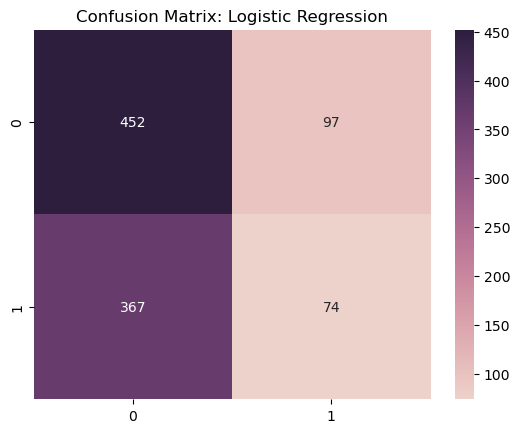

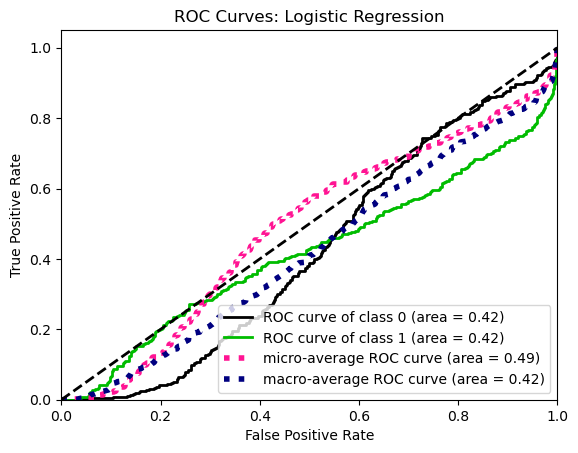

Model:  Decision Tree Classifier
Validation Accuracy:  0.9888888888888889
Training Accuracy:  1.0


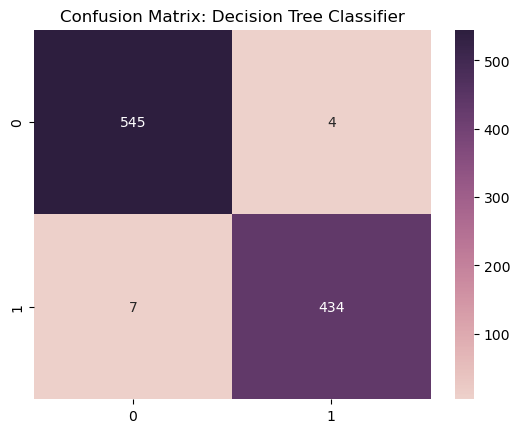

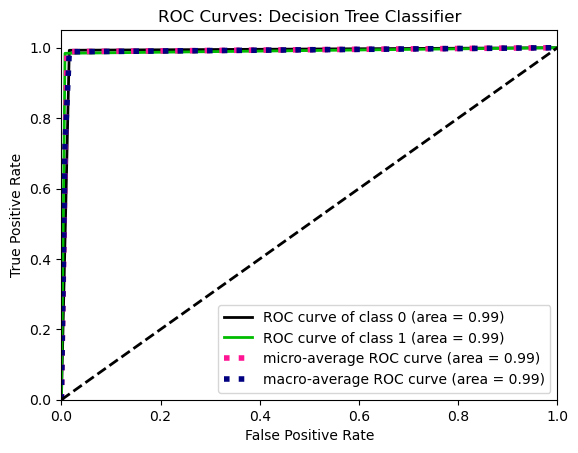

Model:  Random Forest
Validation Accuracy:  1.0
Training Accuracy:  1.0


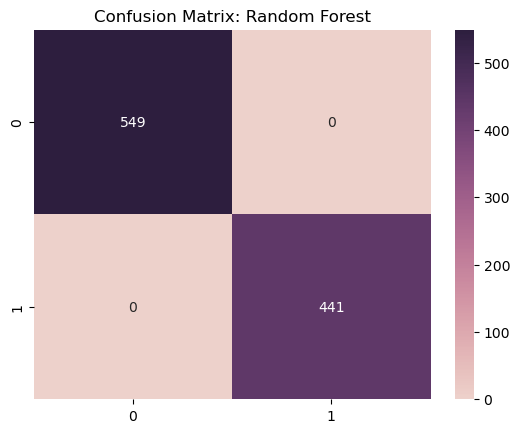

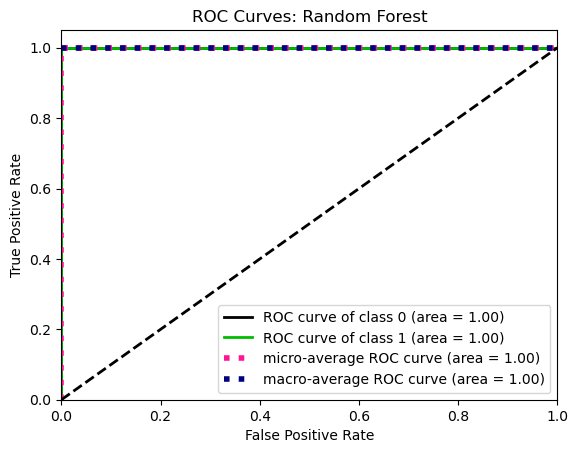

Model:  Linear Discriminant Analyzer
Validation Accuracy:  0.5262626262626262
Training Accuracy:  0.5804074555700043


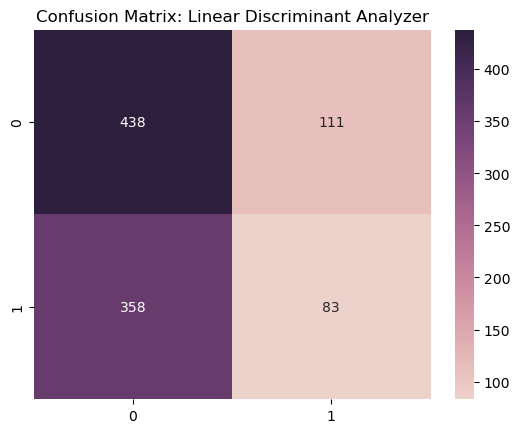

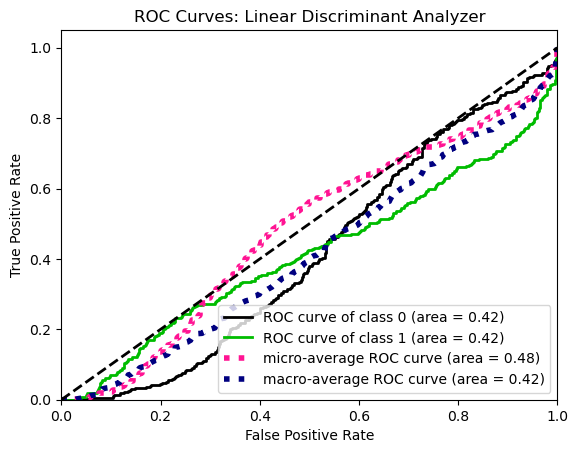

Model:  Ada Boost
Validation Accuracy:  0.9929292929292929
Training Accuracy:  1.0


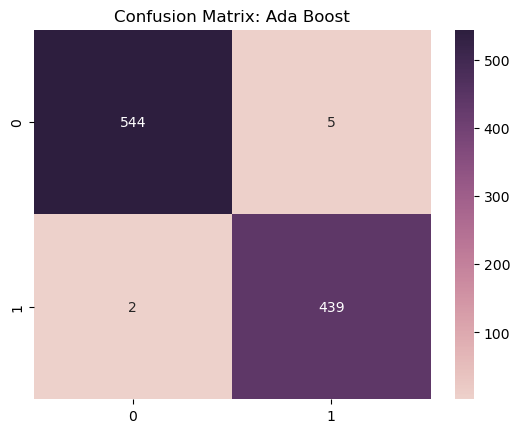

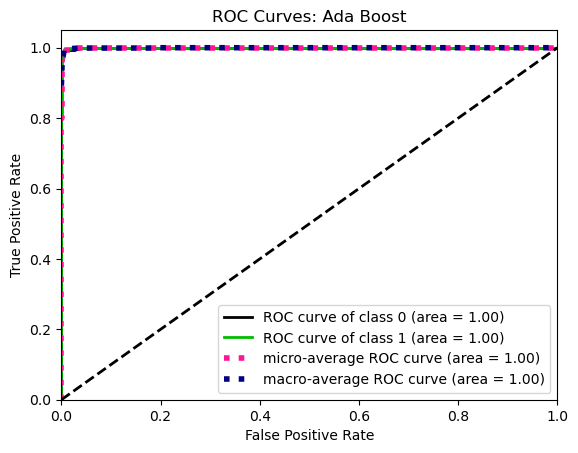

Model:  XGBClassifier
Validation Accuracy:  0.98989898989899
Training Accuracy:  1.0


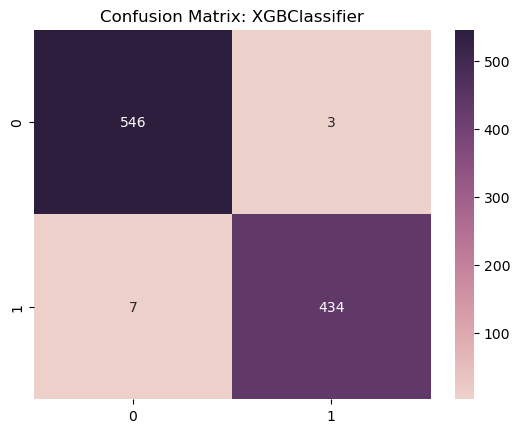

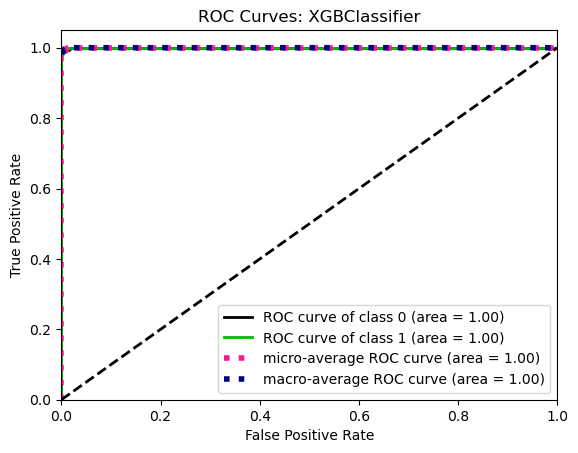

In [ ]:
# Models to be used for ML
models = [('Logistic Regression', LogisticRegression()),
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Linear Discriminant Analyzer', LinearDiscriminantAnalysis()),
          ('Ada Boost', AdaBoostClassifier()),
          ('XGBClassifier',XGBClassifier())
          #('SVC',SVC()


          ]

models_score = []
for name, model in models:
    model = model #Model Object create
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])

    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))

    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()

    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()